### **Ice-Cream Truck Sales EDA**



### **Importing data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/sales.csv')


In [ ]:
df.head()

,sales_date,GTIN,product_name,weekday_name,month_name,dominant_weather_type,dominant_temp_category,daily_sales_count,daily_sales_value
0,1/4/2019,GTIN-4060800171900,Pepsi Regular Cola 330ml bottle,FRI,JAN,windy,cool,57,84.93
1,1/4/2019,GTIN-5017726133887,Coca-Cola Soft Drink Can 330 ml,FRI,JAN,windy,cool,80,119.20
2,1/4/2019,GTIN-5017726170196,Fanta Zero Orange Soft Drink Bottle 500 ml,FRI,JAN,windy,cool,96,239.04
3,1/4/2019,GTIN-8000920461235,Calippo Cola 105ml,FRI,JAN,windy,cool,72,143.28
4,1/4/2019,GTIN-8711327313712,Magnum Vegan Classic 90ml,FRI,JAN,windy,cool,70,209.30


# **Exploring Data**

In [ ]:
#(number of rows, number of columns)
df.shape

(3010, 9)

In [ ]:
df.dtypes

sales_date                datetime64[ns]
GTIN                              object
product_name                      object
weekday_name                      object
month_name                        object
dominant_weather_type             object
dominant_temp_category            object
daily_sales_count                  int64
daily_sales_value                float64
dtype: object

In [ ]:
df['sales_date']=pd.to_datetime(df['sales_date'])

In [ ]:
df.describe()

,daily_sales_count,daily_sales_value
count,3010.000000,3010.000000
mean,457.801993,1125.512512
std,386.831431,1004.041089
min,48.000000,84.930000
25%,124.750000,293.147500
50%,195.000000,550.290000
75%,816.750000,1876.570000
max,1330.000000,3902.220000


In [ ]:
df.describe(include=['object'])

,sales_date,GTIN,product_name,weekday_name,month_name,dominant_weather_type,dominant_temp_category
count,3010,3010,3010,3010,3010,3010,3010
unique,301,10,10,7,12,4,3
top,1/4/2019,GTIN-4060800171900,Pepsi Regular Cola 330ml bottle,SUN,MAR,rainy,warm
freq,10,301,301,440,310,1090,1220


In [ ]:
# Check for missing values in each column
df.isnull().sum()

sales_date                0
GTIN                      0
product_name              0
weekday_name              0
month_name                0
dominant_weather_type     0
dominant_temp_category    0
daily_sales_count         0
daily_sales_value         0
dtype: int64

In [ ]:
#checking for duplicate rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3005    False
3006    False
3007    False
3008    False
3009    False
Length: 3010, dtype: bool

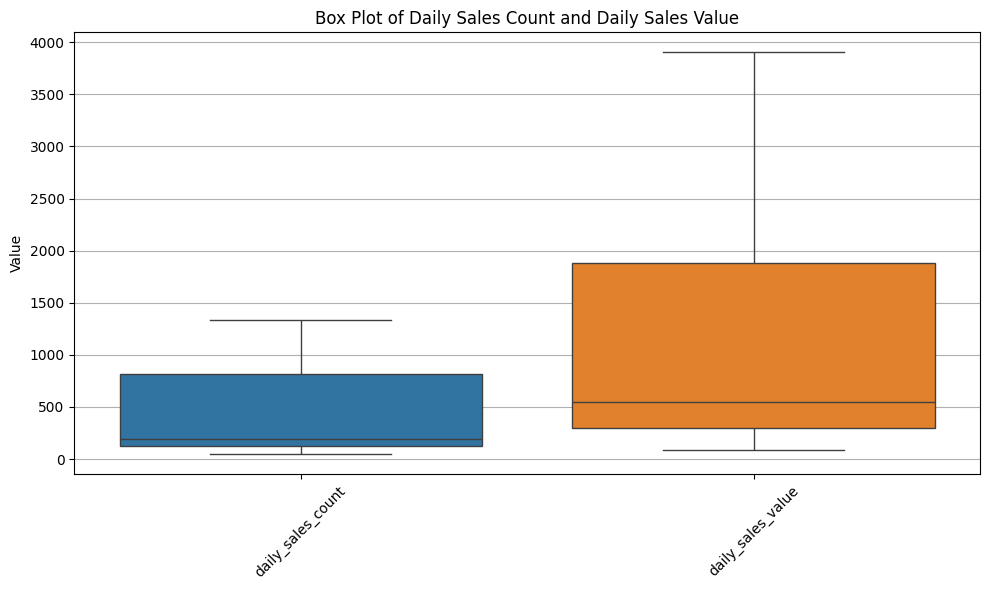

In [ ]:
#checking for any outliers in sales count and sales value

# Specify the columns to visualize
columns_to_plot = ['daily_sales_count', 'daily_sales_value']

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns_to_plot])
plt.title('Box Plot of Daily Sales Count and Daily Sales Value')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **Data Visualization**

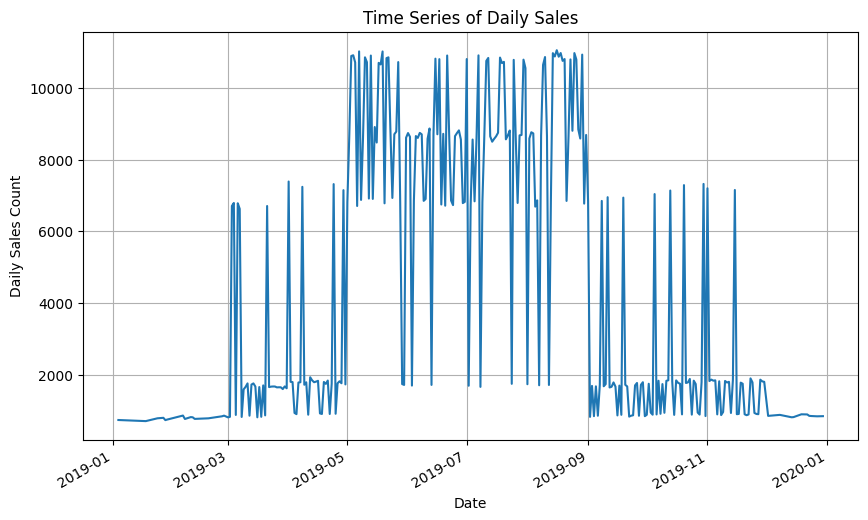

In [ ]:
daily_sales = df.groupby('sales_date')['daily_sales_count'].sum()
# Plot the time series
plt.figure(figsize=(10, 6))
daily_sales.plot()
plt.title('Time Series of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Daily Sales Count')
plt.grid(True)
plt.show()

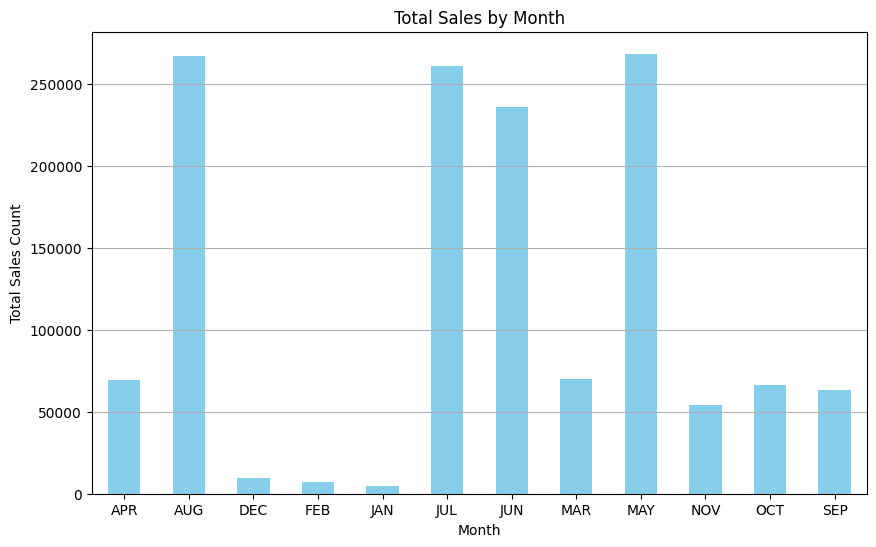

In [ ]:
monthly_sales = df.groupby('month_name')['daily_sales_count'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Count')  # or 'Total Sales Value' depending on what you're plotting
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')
plt.show()

**scatter plot of sales vs temp**

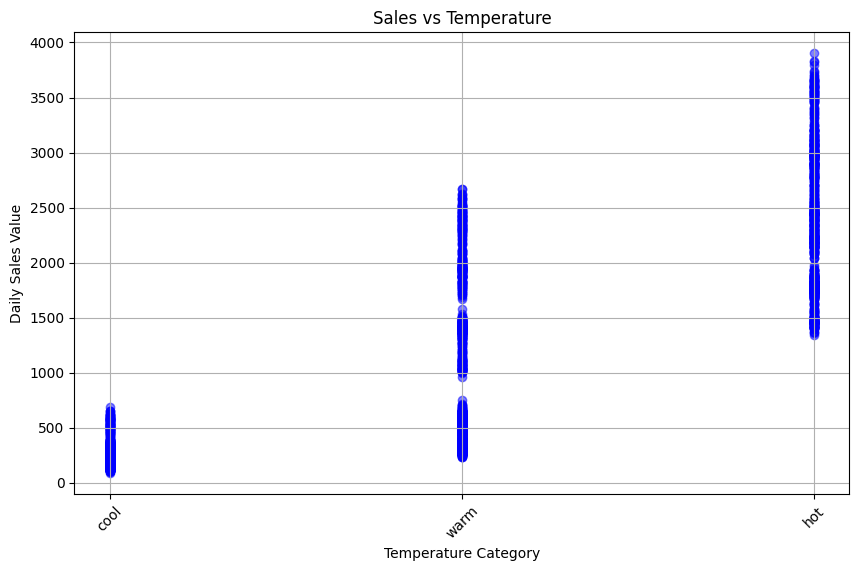

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['dominant_temp_category'], df['daily_sales_value'], color='blue', alpha=0.5)
plt.title('Sales vs Temperature')
plt.xlabel('Temperature Category')
plt.ylabel('Daily Sales Value')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)
plt.show()

In [ ]:
#sales_count vs temp  understanding the correlation
# Perform one-hot encoding on 'dominant_temp_category'
one_hot_encoded = pd.get_dummies(df['dominant_temp_category'], prefix='temp')

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Calculate the correlation coefficient between 'daily_sales_count' and the one-hot encoded temperature categories
correlation = df_encoded[['daily_sales_count'] + list(one_hot_encoded.columns)].corr().iloc[0, 1:]

print("Correlation coefficient between daily sales count and temperature categories:")
print(correlation)


Correlation coefficient between daily sales count and temperature categories:
temp_cool   -0.610323
temp_hot     0.834819
temp_warm   -0.198128
Name: daily_sales_count, dtype: float64


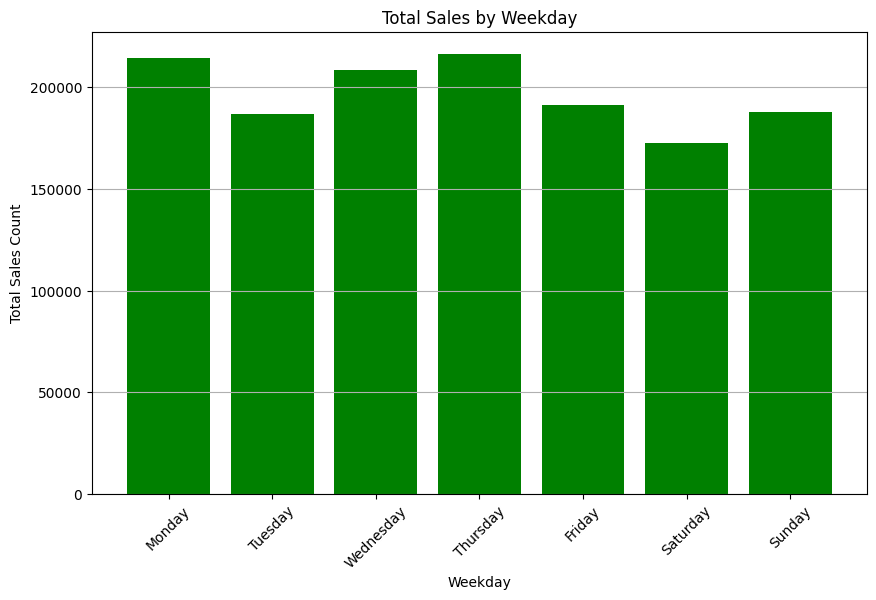

In [ ]:
weekday_sales = df.groupby('weekday_name')['daily_sales_count'].sum()

# Define the labels for the x-axis
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(weekday_labels, weekday_sales, color='green')
plt.title('Total Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales Count')  # or 'Total Sales Value' depending on what you're plotting
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y')
plt.show()

As the 'hot' temperature category increases, daily sales count tends to increase. This suggests that warmer temperatures are associated with higher ice cream sales,

In [ ]:
# Group the data by 'product name' and calculate total sales count for each product
product_sales_count = df.groupby('product_name')['daily_sales_count'].sum()

# Sort the products based on total sales count in descending order
best_selling_products = product_sales_count.sort_values(ascending=False)

# Display the top N best-selling products
N = 5  # Change this value to display the top N best-selling products
print("Top", N, "best-selling ice cream products:")
print(best_selling_products.head(N))


Top 5 best-selling ice cream products:
product_name
Pepsi Regular Cola 330ml bottle               155407
Coca-Cola Soft Drink Can 330 ml               154762
Fanta Zero Orange Soft Drink Bottle 500 ml    154194
Walls Feast Classic 90ml                      141010
Calippo Cola 105ml                            140499
Name: daily_sales_count, dtype: int64


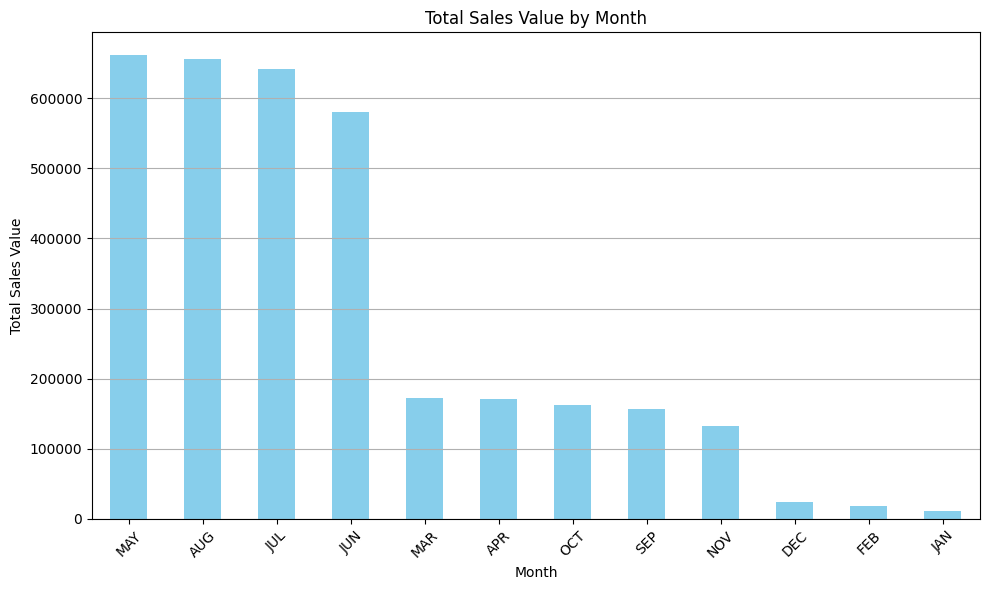

In [ ]:
import matplotlib.pyplot as plt
# Group the data by 'month_name' and calculate total sales value for each month
monthly_sales_value = df.groupby('month_name')['daily_sales_value'].sum()

# Sort the months based on total sales value in descending order
monthly_sales_value_sorted = monthly_sales_value.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
monthly_sales_value_sorted.plot(kind='bar', color='skyblue')
plt.title('Total Sales Value by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()


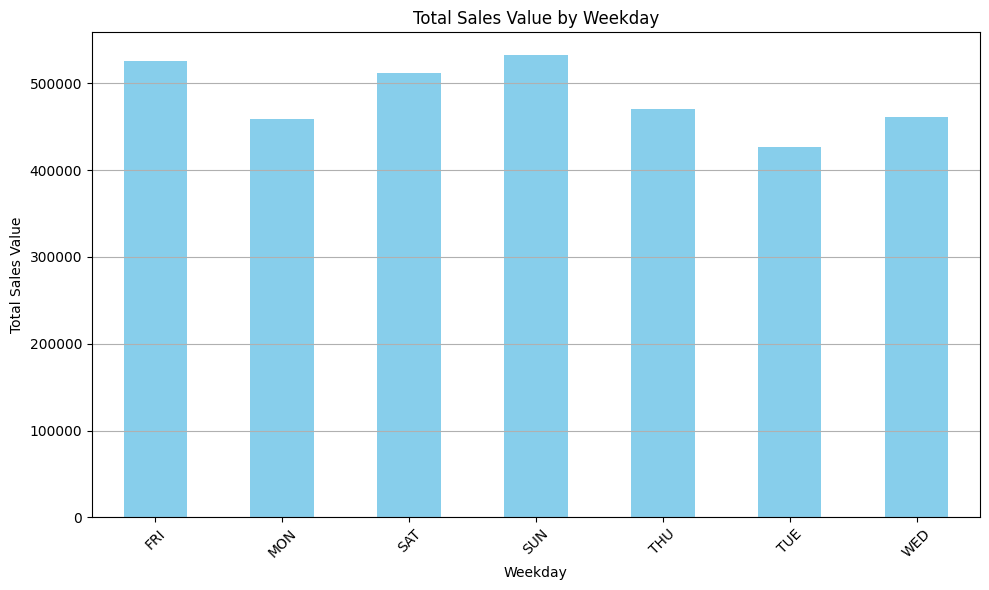

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'weekday_name' and calculate total sales value for each weekday
weekday_sales_value = df.groupby('weekday_name')['daily_sales_value'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
weekday_sales_value.plot(kind='bar', color='skyblue')
plt.title('Total Sales Value by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Based on the previous info,  it appears that "Cornetto Classico 120ml" has the lowest daily sales count among the listed products. With a daily sales count of 114636.
**In the cell below:**
a combined visualization showing the sales of the "Cornetto Classico 120ml" product by both weekday and month.

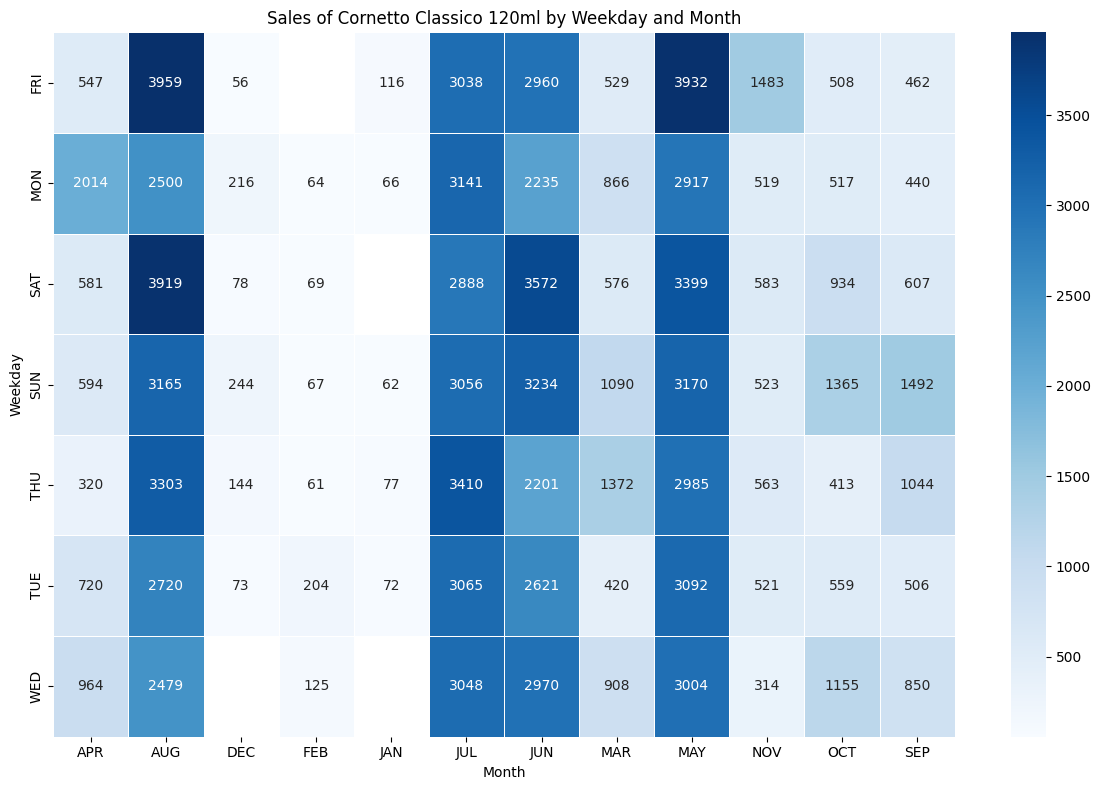

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the "Cornetto Classico 120ml" product
cornetto_sales = df[df['product_name'] == 'Cornetto Classico 120ml']

# Group the filtered data by 'weekday_name' and 'month_name' and calculate the total sales count for each combination
sales_by_weekday_month = cornetto_sales.groupby(['weekday_name', 'month_name'])['daily_sales_count'].sum().reset_index()

# Pivot the data to create a heatmap
sales_heatmap = sales_by_weekday_month.pivot(index='weekday_name', columns='month_name', values='daily_sales_count')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sales_heatmap, cmap='Blues', annot=True, fmt='g', linewidths=.5)
plt.title('Sales of Cornetto Classico 120ml by Weekday and Month')
plt.xlabel('Month')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()


 **Investigating which product has the highest sales pricing**

In [ ]:
# Group the data by 'product_name' and calculate total sales value for each product
product_sales_value = df.groupby('product_name')['daily_sales_value'].sum()

# Find the product with the highest total sales value
highest_sales_product = product_sales_value.idxmax()
highest_sales_value = product_sales_value.max()

print(f"The product with the highest sales value is '{highest_sales_product}' with a total sales value of {highest_sales_value}.")


The product with the highest sales value is 'Cornetto Soft Chocolate 140ml' with a total sales value of 466969.65.


**Investigating which product has the highest sales count**

In [ ]:
# Group the data by 'product_name' and calculate total sales count for each product
product_sales_count = df.groupby('product_name')['daily_sales_count'].sum()

# Find the product with the highest total sales count
highest_sales_count_product = product_sales_count.idxmax()
highest_sales_count = product_sales_count.max()

print(f"The product with the highest sales count is '{highest_sales_count_product}' with a total sales count of {highest_sales_count}.")


The product with the highest sales count is 'Pepsi Regular Cola 330ml bottle' with a total sales count of 155407.


# **Investigating weather and temp data**

Investigating weather data for the ***lowest sales count product***:Cornetto Classico 120ml

In [ ]:
import pandas as pd

# Filter the data for the "Cornetto Classico 120ml" product
cornetto_sales = df[df['product_name'] == 'Cornetto Classico 120ml']

# Group the filtered data by 'dominant_weather_type' and 'dominant_temp_category' and calculate the count of sales for each combination
weather_temp_sales = cornetto_sales.groupby(['dominant_weather_type', 'dominant_temp_category']).size().reset_index(name='sales_count')

print("Weather and Temperature Categories associated with Cornetto Classico 120ml sales:")
print(weather_temp_sales)


Weather and Temperature Categories associated with Cornetto Classico 120ml sales:
  dominant_weather_type dominant_temp_category  sales_count
0                cloudy                    hot           24
1                cloudy                   warm            7
2                 rainy                   cool           33
3                 rainy                    hot           24
4                 rainy                   warm           52
5                 sunny                   cool           17
6                 sunny                    hot           39
7                 sunny                   warm           38
8                 windy                   cool           42
9                 windy                   warm           25


Overall, these insights suggest ***that the sales of "Cornetto Classico 120ml" are not heavily dependent on specific weather or temperature conditions***, as customers purchase the product across a range of weather types and temperatures. However, certain weather conditions, such as rainy weather, may have a slightly more pronounced effect on sales compared to others.










It's essential to recognize that the association between weather circumstances and sales of a particular product does not necessarily imply causation. While the "Cornetto Classico 120ml" product may indeed be associated with various weather conditions, it doesn't mean that weather directly influences its popularity or sales volume.

The fact that "Cornetto Classico 120ml" has lower sales compared to other products could be attributed to various factors unrelated to weather, such as:

***Consumer Preferences:*** Customers may simply prefer other products over "Cornetto Classico 120ml" for reasons unrelated to weather, such as taste preferences, brand loyalty, or promotional activities.

***Competition:*** The product may face stiff competition from other similar products or alternative dessert options available in the market.

***Marketing and Promotion:*** Differences in marketing strategies, product placement, and promotional activities could influence consumer awareness and purchasing decisions.


**Highest & lowest sales  product**

In [ ]:
# Group the data by 'product_name' and calculate total daily sales value for each product
product_total_sales = df.groupby('product_name')['daily_sales_value'].sum()

# Find the product with the highest total daily sales value
highest_sales_product = product_total_sales.idxmax()
highest_sales_value = product_total_sales.max()

# Find the product with the lowest total daily sales value
lowest_sales_product = product_total_sales.idxmin()
lowest_sales_value = product_total_sales.min()

print(f"The product with the highest daily sales value is '{highest_sales_product}' with a total daily sales value of {highest_sales_value}.")
print(f"The product with the lowest daily sales value is '{lowest_sales_product}' with a total daily sales value of {lowest_sales_value}.")


The product with the highest daily sales value is 'Cornetto Soft Chocolate 140ml' with a total daily sales value of 466969.65.
The product with the lowest daily sales value is 'Coca-Cola Soft Drink Can 330 ml' with a total daily sales value of 230595.38.
